

# Simple Linear Regression BTC/USDT
**Simple Linear Regression**

Simple linear regression is used to model the relationship between two continuous variables. Often, the objective is to predict the value of an output variable (or response) based on the value of an input (or predictor) variable.


**What is BTC/USDT?**

The underlying price is the BTC/USDT Spot Index. This Index is the volume-weighted average USDT price of Bitcoin in 6 exchanges including Poloniex, Binance, OKEX, Huobi, Hitbtc and KuCoin. ... For example, a trader goes long 1,000 contracts at a price of 10,000 USDT. Equivalently, they are long 1,000 * 0.001 = 1 BTC.


### Importing Needed packages


In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data

To download the data, we will use !wget to download it from my github AI Projects Object Storage.


In [102]:
!wget -O Binance_BTCUSDT_d.csv https://raw.githubusercontent.com/ajee10x/AI-Projects/main/Binance_BTCUSDT_d.csv

--2022-01-05 12:41:12--  https://raw.githubusercontent.com/ajee10x/AI-Projects/main/Binance_BTCUSDT_d.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102935 (101K) [text/plain]
Saving to: ‘Binance_BTCUSDT_d.csv’

Binance_BTCUSDT_d.c 100%[===================>] 100.52K  --.-KB/s    in 0.003s  

2022-01-05 12:41:12 (29.2 MB/s) - ‘Binance_BTCUSDT_d.csv’ saved [102935/102935]



**How can you run this Notebook?** When it comes to Machine Learning and AI, you will likely be working with large datasets. As a tester or researcher or whatever you are, where can you host your data? You could use [Google Colab](https://colab.research.google.com/), or [IBM Watson Studio](https://www.ibm.com/cloud/watson-studio), or even you could download [Visual Studio Code
](https://code.visualstudio.com/), can I advise to use Google Colab, it's easy to use and all you need to have a Google account.


## Understanding the Data

### `Binance_BTCUSDT_d.csv`:

We have downloaded a  BTC/USDT  dataset, **`Binance_BTCUSDT_d.csv`**, Historical OHLC Price Data includes Volume and Trade counts. [Dataset source](https://www.cryptodatadownload.com/data/binance/)

* **Unix Timestamp** - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone
*  **Date** - This timestamp is UTC Timezone
*  **Symbol** - The symbol for which the timeseries data refers
*  **Open** - This is the opening price of the time period
*  **High** - This is the highest price of the time period
*  **Low** - This is the lowest price of the time period
*  **Close** - This is the closing price of the time period
*  **Volume (Crypto)** - This is the volume in the transacted Ccy. Ie. For BTC/USDT, this is in BTC amount
*  **Volume Base Ccy** - This is the volume in the base/converted ccy. Ie. For BTC/USDT, this is in USDT amount
*  **Trade Count** - This is the unique number of trades for the given time period


## Reading the data in


In [103]:
df = pd.read_csv("Binance_BTCUSDT_d.csv")

# take a look at the dataset
df.head()



,date,open,high,low,close,Volume BTC,Volume USDT
0,8/17/2017,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11
1,8/18/2017,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56
2,8/19/2017,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39
3,8/20/2017,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35
4,8/21/2017,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06


In [104]:
# take a look at the tail of the data set
df.tail()

,date,open,high,low,close,Volume BTC,Volume USDT
1596,12/29/2021,47543.74,48139.08,46096.99,46464.66,39498.87000,1.873786e+09
1597,12/30/2021,46464.66,47900.00,45900.00,47120.87,30352.29569,1.428756e+09
1598,12/31/2021,47120.88,48548.26,45678.00,46216.93,34937.99796,1.650716e+09
1599,1/1/2022,46216.93,47954.63,46208.37,47722.65,19604.46325,9.241552e+08
1600,1/2/2022,47722.66,47750.00,47463.63,47495.14,291.10149,1.386357e+07


### Data Exploration

Let's first have a descriptive exploration on our data.


In [105]:
# summarize the data
df.describe()

,open,high,low,close,Volume BTC,Volume USDT
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1.601000e+03
mean,17440.424229,17965.870768,16841.788495,17467.361043,50285.699734,1.040761e+09
std,17286.946271,17790.095938,16705.273566,17300.327876,36358.240027,1.400557e+09
min,3189.020000,3276.500000,2817.000000,3189.020000,225.760000,9.677533e+05
25%,6733.640000,6895.540000,6567.000000,6737.360000,28420.836660,2.128692e+08
50%,9289.850000,9464.530000,9080.100000,9292.240000,43408.475620,4.118006e+08
75%,18655.660000,19177.000000,18000.000000,18703.800000,64595.287680,1.397525e+09
max,67525.820000,69000.000000,66222.400000,67525.830000,402201.673800,1.347769e+10


Let's select some features to explore more.


In [106]:
cdf = df[['date', 'open','high','low','close', 'Volume BTC', 'Volume USDT']]
cdf.head(9)

,date,open,high,low,close,Volume BTC,Volume USDT
0,8/17/2017,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11
1,8/18/2017,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56
2,8/19/2017,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39
3,8/20/2017,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35
4,8/21/2017,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06
5,8/22/2017,4016.00,4104.82,3400.00,4040.00,939.91,3648726.50
6,8/23/2017,4040.00,4265.80,4013.89,4114.01,980.50,4062506.52
7,8/24/2017,4114.01,4371.68,4085.01,4316.01,770.46,3225405.80
8,8/25/2017,4316.01,4453.91,4247.48,4280.68,563.36,2440323.79


We can plot each of these features:


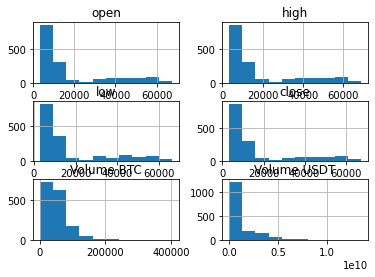

In [107]:
viz = cdf[['open','high','low','close', 'Volume BTC', 'Volume USDT']]
viz.hist()
plt.show()

Now, let's plot each of these features against the date, to see how linear their relationship is:


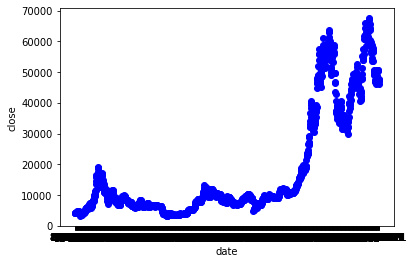

In [108]:
plt.scatter(cdf.date, cdf.close,  color='blue')
plt.xlabel("date")
plt.ylabel("close")
plt.show()

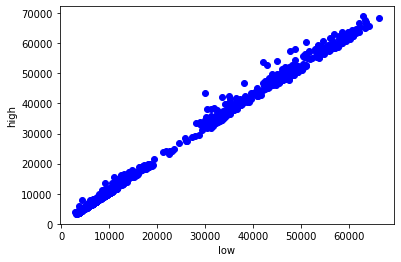

In [109]:
plt.scatter(cdf.low, cdf.high,  color='blue')
plt.xlabel("low")
plt.ylabel("high")
plt.show()

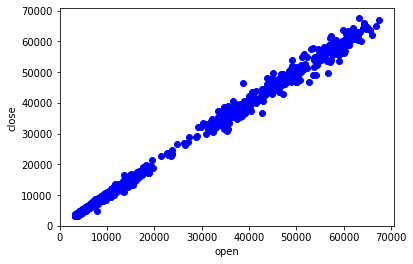

In [110]:
plt.scatter(cdf.open, cdf.close,  color='blue')
plt.xlabel("open")
plt.ylabel("close")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:


In [111]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


#### Train data distribution


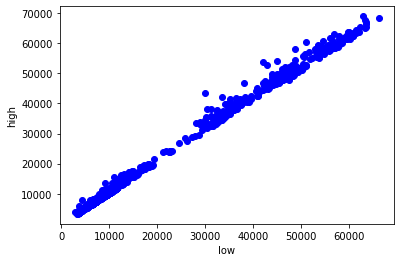

In [112]:
plt.scatter(train.low, train.high,  color='blue')
plt.xlabel("low")
plt.ylabel("high")
plt.show()

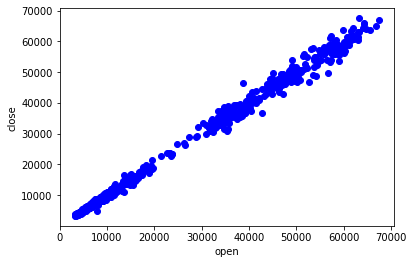

In [113]:
plt.scatter(train.open, train.close,  color='blue')
plt.xlabel("open")
plt.ylabel("close")
plt.show()

#### Modeling

Using sklearn package to model data.


In [114]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['low']])
train_y = np.asanyarray(train[['high']])
regr.fit (train_x, train_y)

LinearRegression()

#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'high')

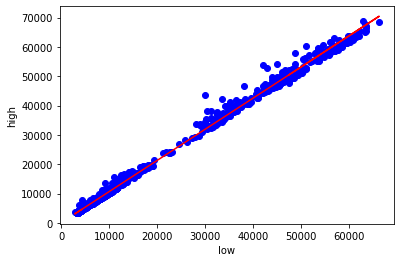

In [115]:
plt.scatter(train.low, train.high,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("low")
plt.ylabel("high")

Text(0, 0.5, 'low')

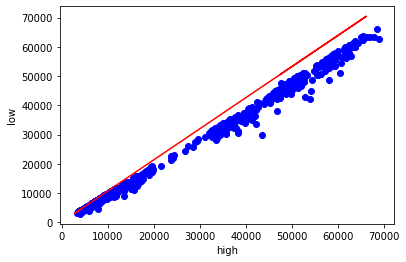

In [116]:
plt.scatter(train.high, train.low,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("high")
plt.ylabel("low")

Text(0, 0.5, 'close')

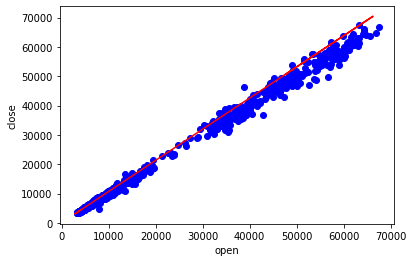

In [117]:
plt.scatter(train.open, train.close,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("open")
plt.ylabel("close")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [118]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['low']])
test_y = np.asanyarray(test[['high']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 476.44
Residual sum of squares (MSE): 709802.07
R2-score: 1.00


### Thank you for reading this Notebook!

## Author

Ahmad Kataranjee

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2022-01-05        | 1.0     | Kataranjee       | Published |
|                   |         |               |                                    |
|                   |         |               |                                    |

## <h3 align="center"> © Apache-2.0 License. <h3/>
